In [1]:
import re
import nltk
import spacy
import codecs
import requests

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from textblob import TextBlob
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook
from wordcloud import WordCloud
from nltk.corpus import stopwords
from bs4 import BeautifulSoup as bs
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

In [2]:
# 2. Multi-page web-scraping
headers = {'authority': 'www.amazon.in',
           'accept-language': 'en-US,en;q=0.9',
           'referer': 'https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/dp/B0B574QXFL/ref=sr_1_3?adgrpid=66314740727&ext_vrnc=hi&gclid=CjwKCAiAheacBhB8EiwAItVO27OqojMgIrqr8l4RkhJXVEgEYEy5H4Hv_ggVfrdU-8RF6WYv_aDItRoCKvwQAvD_BwE&hvadid=398059830400&hvdev=c&hvlocphy=1007768&hvnetw=g&hvqmt=b&hvrand=1335892987492695214&hvtargid=kwd-1434352673191&hydadcr=24569_1971431&keywords=boat+xtend+pro&qid=1671035479&sr=8-3',
           'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'}


In [3]:
#Looping through multiple pages
def get_soup(url):
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [4]:
reviewlist = []

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
                      'Rating':float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
                      'Review':item.find('span', {'data-hook': 'review-body'}).text.strip(),
                      'Review_Date':item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India 🇮🇳 on', 'Reviewed in India on').strip()}
            reviewlist.append(review)
    except:
        pass

In [5]:
for x in tqdm_notebook(range(160)):
    soup = get_soup(f'https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/product-reviews/B0B574QXFL/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    get_reviews(soup)
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

  0%|          | 0/160 [00:00<?, ?it/s]

In [6]:
#Save results to a Dataframe, then export as CSV
df = pd.DataFrame(reviewlist)
df

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nThis is a smartwatch which...,5.0,Pros:Look and Feel:This feels and looks very p...,Reviewed in India on 5 November 2023
1,4.0 out of 5 stars\nGood product.,4.0,This smart (model Boat extend plus) watch is f...,Reviewed in India on 27 August 2023
2,5.0 out of 5 stars\nGood quality watch,5.0,It is good quality watch which gives accurate ...,Reviewed in India on 3 December 2023
3,5.0 out of 5 stars\nWatch was amezing,5.0,The watch was amazing. Bought it at July 2022 ...,Reviewed in India on 3 December 2023
4,3.0 out of 5 stars\nGood watch but bit tricky ...,3.0,1. Good for Bluetooth calling but very difficu...,Reviewed in India on 15 November 2023
5,4.0 out of 5 stars\nPremium quality Value for ...,4.0,"Awesome design, sound and features. Also have ...",Reviewed in India on 31 October 2023
6,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,Reviewed in India on 12 August 2021
7,3.0 out of 5 stars\nGood build quality & displ...,3.0,Skipping the parts mostly covered in other rev...,Reviewed in India on 9 August 2022
8,3.0 out of 5 stars\nNOt worth the money,3.0,Review OverviewAverage2.7The Boat today launch...,Reviewed in India on 17 May 2022
9,4.0 out of 5 stars\nEverything is very good ex...,4.0,"Drawbacks•Let's know this first, which is not ...",Reviewed in India on 10 December 2023


In [7]:
df["Review_Date"] = df["Review_Date"].replace('Reviewed in India on','', regex=True)


In [8]:
df

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nThis is a smartwatch which...,5.0,Pros:Look and Feel:This feels and looks very p...,5 November 2023
1,4.0 out of 5 stars\nGood product.,4.0,This smart (model Boat extend plus) watch is f...,27 August 2023
2,5.0 out of 5 stars\nGood quality watch,5.0,It is good quality watch which gives accurate ...,3 December 2023
3,5.0 out of 5 stars\nWatch was amezing,5.0,The watch was amazing. Bought it at July 2022 ...,3 December 2023
4,3.0 out of 5 stars\nGood watch but bit tricky ...,3.0,1. Good for Bluetooth calling but very difficu...,15 November 2023
5,4.0 out of 5 stars\nPremium quality Value for ...,4.0,"Awesome design, sound and features. Also have ...",31 October 2023
6,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,12 August 2021
7,3.0 out of 5 stars\nGood build quality & displ...,3.0,Skipping the parts mostly covered in other rev...,9 August 2022
8,3.0 out of 5 stars\nNOt worth the money,3.0,Review OverviewAverage2.7The Boat today launch...,17 May 2022
9,4.0 out of 5 stars\nEverything is very good ex...,4.0,"Drawbacks•Let's know this first, which is not ...",10 December 2023


In [9]:
df.to_csv("BoatSmartWatch_Review.csv")


In [10]:
# 3. Load Dataset
reviews = pd.read_csv('BoatSmartWatch_Review.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nThis is a smartwatch which...,5.0,Pros:Look and Feel:This feels and looks very p...,5 November 2023
1,4.0 out of 5 stars\nGood product.,4.0,This smart (model Boat extend plus) watch is f...,27 August 2023
2,5.0 out of 5 stars\nGood quality watch,5.0,It is good quality watch which gives accurate ...,3 December 2023
3,5.0 out of 5 stars\nWatch was amezing,5.0,The watch was amazing. Bought it at July 2022 ...,3 December 2023
4,3.0 out of 5 stars\nGood watch but bit tricky ...,3.0,1. Good for Bluetooth calling but very difficu...,15 November 2023
5,4.0 out of 5 stars\nPremium quality Value for ...,4.0,"Awesome design, sound and features. Also have ...",31 October 2023
6,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,12 August 2021
7,3.0 out of 5 stars\nGood build quality & displ...,3.0,Skipping the parts mostly covered in other rev...,9 August 2022
8,3.0 out of 5 stars\nNOt worth the money,3.0,Review OverviewAverage2.7The Boat today launch...,17 May 2022
9,4.0 out of 5 stars\nEverything is very good ex...,4.0,"Drawbacks•Let's know this first, which is not ...",10 December 2023


In [11]:
# Data Exploration
reviews.Rating.describe()

count    10.000000
mean      4.100000
std       0.875595
min       3.000000
25%       3.250000
50%       4.000000
75%       5.000000
max       5.000000
Name: Rating, dtype: float64

In [12]:
reviews.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        10 non-null     object 
 1   Rating       10 non-null     float64
 2   Review       10 non-null     object 
 3   Review_Date  10 non-null     object 
dtypes: float64(1), object(3)
memory usage: 452.0+ bytes


In [13]:
reviews.isna().sum()


Title          0
Rating         0
Review         0
Review_Date    0
dtype: int64

In [14]:
reviews.dropna(subset=['Review'],inplace=True)
reviews.head()

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nThis is a smartwatch which...,5.0,Pros:Look and Feel:This feels and looks very p...,5 November 2023
1,4.0 out of 5 stars\nGood product.,4.0,This smart (model Boat extend plus) watch is f...,27 August 2023
2,5.0 out of 5 stars\nGood quality watch,5.0,It is good quality watch which gives accurate ...,3 December 2023
3,5.0 out of 5 stars\nWatch was amezing,5.0,The watch was amazing. Bought it at July 2022 ...,3 December 2023
4,3.0 out of 5 stars\nGood watch but bit tricky ...,3.0,1. Good for Bluetooth calling but very difficu...,15 November 2023


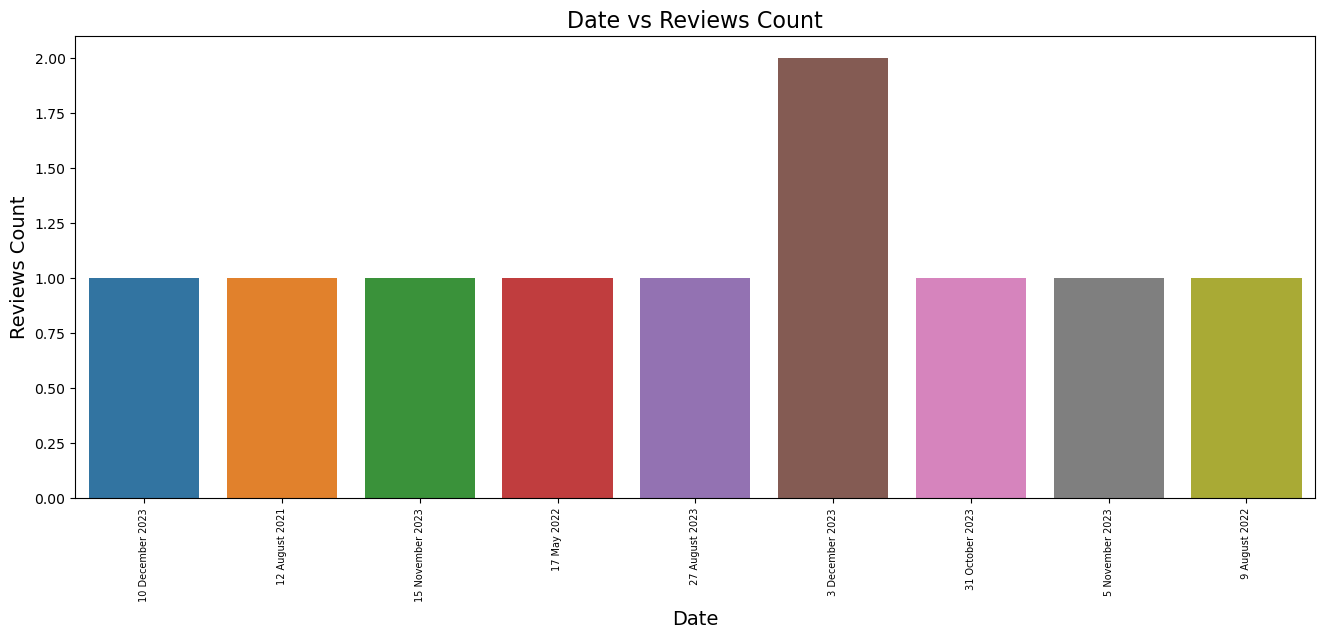

In [15]:
#  Data Visualization
#Date vs Review Count
#Creating a dataframe
dayreview = pd.DataFrame(reviews.groupby('Review_Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Review_Date']
dayreview.sort_values(by = ['Review_Date'])

#Plotting the graph
plt.figure(figsize=(16,6))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews Count', fontsize=16)
plt.xticks(rotation=90,fontsize=7)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Reviews Count',fontsize=14)
plt.show()


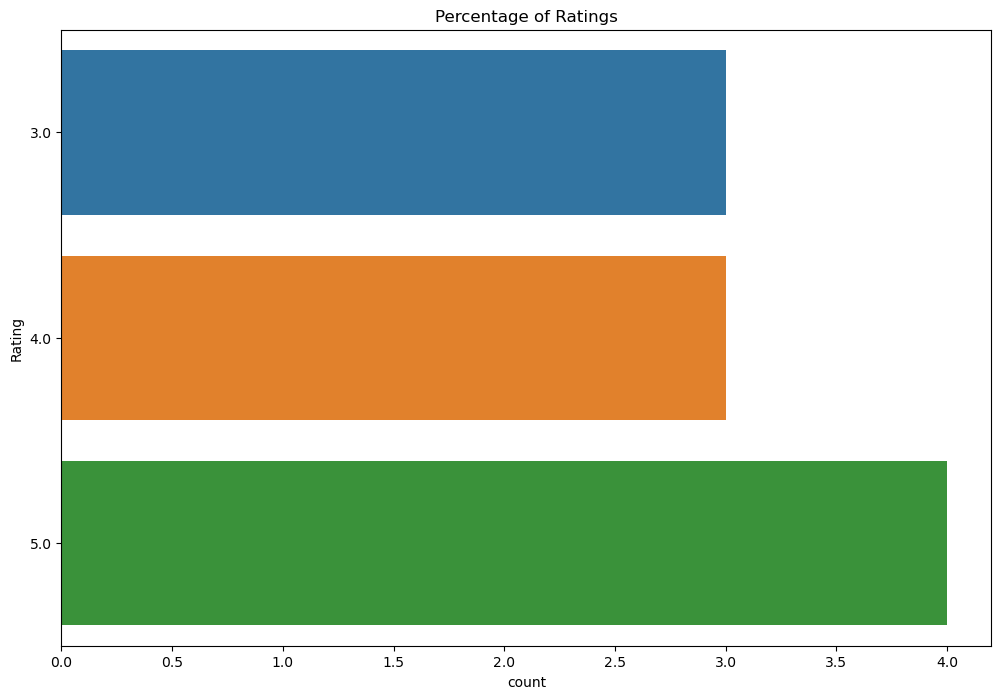

In [16]:
#Percentage of Ratings
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02


In [17]:
reviews['Review']

0    Pros:Look and Feel:This feels and looks very p...
1    This smart (model Boat extend plus) watch is f...
2    It is good quality watch which gives accurate ...
3    The watch was amazing. Bought it at July 2022 ...
4    1. Good for Bluetooth calling but very difficu...
5    Awesome design, sound and features. Also have ...
6    The media could not be loaded.\n              ...
7    Skipping the parts mostly covered in other rev...
8    Review OverviewAverage2.7The Boat today launch...
9    Drawbacks•Let's know this first, which is not ...
Name: Review, dtype: object

In [18]:
boat_review = reviews[['Review']]
boat_review

,Review
0,Pros:Look and Feel:This feels and looks very p...
1,This smart (model Boat extend plus) watch is f...
2,It is good quality watch which gives accurate ...
3,The watch was amazing. Bought it at July 2022 ...
4,1. Good for Bluetooth calling but very difficu...
5,"Awesome design, sound and features. Also have ..."
6,The media could not be loaded.\n ...
7,Skipping the parts mostly covered in other rev...
8,Review OverviewAverage2.7The Boat today launch...
9,"Drawbacks•Let's know this first, which is not ..."


In [19]:
# Resetting index
boat_review.reset_index(drop=True, inplace=True)

In [20]:
stop_words = stopwords.words('english')
boat_review['Review'] = boat_review['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() if x not in stop_words))

In [21]:
# Lemmatizer
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(boat_review))):
    cleaned = re.sub('[^a-zA-Z]', " ", boat_review["Review"][i])
    cleaned = cleaned.lower()
    cleaned = cleaned.split()
    cleaned = [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned = ' '.join(cleaned)
    corpus.append(cleaned)

  0%|          | 0/10 [00:00<?, ?it/s]

In [22]:
# #Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": boat_review.Review})
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,pro look feel feel look premium strap quality ...,"pros:look feel:this feels looks premium, strap..."
1,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
2,good quality watch give accurate data exercise...,it good quality watch gives accurate data exer...
3,watch amazing bought july birthday sold nov go...,the watch amazing. bought july 2022 birthday. ...
4,good bluetooth calling difficult use bluetooth...,1. good bluetooth calling difficult use blueto...


In [23]:
# Text Pre-processing Techniques
#Removing '@names'
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

In [24]:
# # We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,pro look feel feel look premium strap quality ...,"pros:look feel:this feels looks premium, strap..."
1,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
2,good quality watch give accurate data exercise...,it good quality watch gives accurate data exer...
3,watch amazing bought july birthday sold nov go...,the watch amazing. bought july 2022 birthday. ...
4,good bluetooth calling difficult use bluetooth...,1. good bluetooth calling difficult use blueto...
5,awesome design sound feature also customizable...,"awesome design, sound features. also customiza..."
6,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
7,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
8,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
9,drawback let know first much st delivery late ...,"drawbacks•let's know first, much...1st deliver..."


In [25]:
# B. Removing links (http | https)
cleaned_reviews = []

for index, row in dataframe.iterrows():
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,pro look feel feel look premium strap quality ...,"pros:look feel:this feels looks premium, strap..."
1,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
2,good quality watch give accurate data exercise...,it good quality watch gives accurate data exer...
3,watch amazing bought july birthday sold nov go...,the watch amazing. bought july 2022 birthday. ...
4,good bluetooth calling difficult use bluetooth...,1. good bluetooth calling difficult use blueto...
5,awesome design sound feature also customizable...,"awesome design, sound features. also customiza..."
6,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
7,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
8,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
9,drawback let know first much st delivery late ...,"drawbacks•let's know first, much...1st deliver..."


In [26]:
# Removing Review with empty text
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,pro look feel feel look premium strap quality ...,"pros:look feel:this feels looks premium, strap..."
1,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
2,good quality watch give accurate data exercise...,it good quality watch gives accurate data exer...
3,watch amazing bought july birthday sold nov go...,the watch amazing. bought july 2022 birthday. ...
4,good bluetooth calling difficult use bluetooth...,1. good bluetooth calling difficult use blueto...
5,awesome design sound feature also customizable...,"awesome design, sound features. also customiza..."
6,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
7,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
8,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
9,drawback let know first much st delivery late ...,"drawbacks•let's know first, much...1st deliver..."


In [27]:
#Dropping duplicate rows
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,pro look feel feel look premium strap quality ...,"pros:look feel:this feels looks premium, strap..."
1,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
2,good quality watch give accurate data exercise...,it good quality watch gives accurate data exer...
3,watch amazing bought july birthday sold nov go...,the watch amazing. bought july 2022 birthday. ...
4,good bluetooth calling difficult use bluetooth...,1. good bluetooth calling difficult use blueto...
5,awesome design sound feature also customizable...,"awesome design, sound features. also customiza..."
6,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
7,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
8,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
9,drawback let know first much st delivery late ...,"drawbacks•let's know first, much...1st deliver..."


In [28]:
# Function to remove emoji
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [29]:
 dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,pro look feel feel look premium strap quality ...,"pros:look feel:this feels looks premium, strap..."
1,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
2,good quality watch give accurate data exercise...,it good quality watch gives accurate data exer...
3,watch amazing bought july birthday sold nov go...,the watch amazing. bought july 2022 birthday. ...
4,good bluetooth calling difficult use bluetooth...,1. good bluetooth calling difficult use blueto...
5,awesome design sound feature also customizable...,"awesome design, sound features. also customiza..."
6,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
7,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
8,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
9,drawback let know first much st delivery late ...,"drawbacks•let's know first, much...1st deliver..."


In [30]:
# Removing Stop words
with codecs.open("stop.txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop[:101])

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
again


In [31]:
stop.split(" ")


["a\r\na's\r\nable\r\nabout\r\nabove\r\naccording\r\naccordingly\r\nacross\r\nactually\r\nafter\r\nafterwards\r\nagain\r\nagainst\r\nain't\r\nall\r\nallow\r\nallows\r\nalmost\r\nalone\r\nalong\r\nalready\r\nalso\r\nalthough\r\nalways\r\nam\r\namong\r\namongst\r\nan\r\nand\r\nanother\r\nany\r\nanybody\r\nanyhow\r\nanyone\r\nanything\r\nanyway\r\nanyways\r\nanywhere\r\napart\r\nappear\r\nappreciate\r\nappropriate\r\nare\r\naren't\r\naround\r\nas\r\naside\r\nask\r\nasking\r\nassociated\r\nat\r\navailable\r\naway\r\nawfully\r\nb\r\nbe\r\nbecame\r\nbecause\r\nbecome\r\nbecomes\r\nbecoming\r\nbeen\r\nbefore\r\nbeforehand\r\nbehind\r\nbeing\r\nbelieve\r\nbelow\r\nbeside\r\nbesides\r\nbest\r\nbetter\r\nbetween\r\nbeyond\r\nboth\r\nbrief\r\nbut\r\nby\r\nc\r\nc'mon\r\nc's\r\ncame\r\ncan\r\ncan't\r\ncannot\r\ncant\r\ncause\r\ncauses\r\ncertain\r\ncertainly\r\nchanges\r\nclearly\r\nco\r\ncom\r\ncome\r\ncomes\r\nconcerning\r\nconsequently\r\nconsider\r\nconsidering\r\ncontain\r\ncontaining\r\nconta

In [32]:
my_stop_words = stopwords.words('english')
sw_list = [stop]
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in dataframe.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))
    
dataframe['Clean_Reviews'] = cleaned_tweets
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,pro look feel feel look premium strap quality ...,"pros:look feel:this feels looks premium, strap..."
1,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
2,good quality watch give accurate data exercise...,it good quality watch gives accurate data exer...
3,watch amazing bought july birthday sold nov go...,the watch amazing. bought july 2022 birthday. ...
4,good bluetooth calling difficult use bluetooth...,1. good bluetooth calling difficult use blueto...
5,awesome design sound feature also customizable...,"awesome design, sound features. also customiza..."
6,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
7,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
8,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
9,drawback let know first much st delivery late ...,"drawbacks•let's know first, much...1st deliver..."


In [33]:
#okenize 'Clean_Reviews'
TextBlob(dataframe['Clean_Reviews'][1]).words

WordList(['smart', 'model', 'boat', 'extend', 'plus', 'watch', 'functioning', 'well', 'worth', 'price', 'r', 'battery', 'beginning', 'lasted', 'day', 'next', 'charge', 'lasted', 'day', 'last', 'settled', 'one', 'day', 'extensive', 'user', 'apps', 'amoled', 'display', 'good', 'touch', 'feature', 'good', 'access', 'apps', 'easily', 'reachable', 'simple', 'browsing', 'feature', 'sleep', 'measurement', 'good', 'taking', 'day', 'time', 'nap', 'night', 'time', 'showing', 'exactly', 'went', 'sleep', 'woke', 'spo', 'measurement', 'neaarer', 'measurement', 'personal', 'digital', 'instrument', 'heart', 'rate', 'measurement', 'also', 'nearer', 'instrument', 'stress', 'also', 'reflecting', 'nearly', 'real', 'condition', 'activity', 'step', 'showing', 'correct', 'distance', 'also', 'good', 'watch', 'taking', 'bike', 'ride', 'walking', 'showing', 'distance', 'covered', 'set', 'target', 'sport', 'feature', 'checked', 'yet', 'fully', 'checked', 'feature', 'functional', 'water', 'resistant', 'yes', 'wa

In [34]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [pro, look, feel, feel, look, premium, strap, ...
1    [smart, model, boat, extend, plus, watch, func...
2    [good, quality, watch, give, accurate, data, e...
3    [watch, amazing, bought, july, birthday, sold,...
4    [good, bluetooth, calling, difficult, use, blu...
5    [awesome, design, sound, feature, also, custom...
6    [medium, could, loaded, used, watch, month, bo...
7    [skipping, part, mostly, covered, review, spon...
8    [review, overviewaverage, boat, today, launche...
9    [drawback, let, know, first, much, st, deliver...
Name: Clean_Reviews, dtype: object

In [35]:
dataframe['Tokenized_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews
0,pro look feel feel look premium strap quality ...,"pros:look feel:this feels looks premium, strap...","[pro, look, feel, feel, look, premium, strap, ..."
1,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...,"[smart, model, boat, extend, plus, watch, func..."
2,good quality watch give accurate data exercise...,it good quality watch gives accurate data exer...,"[good, quality, watch, give, accurate, data, e..."
3,watch amazing bought july birthday sold nov go...,the watch amazing. bought july 2022 birthday. ...,"[watch, amazing, bought, july, birthday, sold,..."
4,good bluetooth calling difficult use bluetooth...,1. good bluetooth calling difficult use blueto...,"[good, bluetooth, calling, difficult, use, blu..."
5,awesome design sound feature also customizable...,"awesome design, sound features. also customiza...","[awesome, design, sound, feature, also, custom..."
6,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....,"[medium, could, loaded, used, watch, month, bo..."
7,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...,"[skipping, part, mostly, covered, review, spon..."
8,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...,"[review, overviewaverage, boat, today, launche..."
9,drawback let know first much st delivery late ...,"drawbacks•let's know first, much...1st deliver...","[drawback, let, know, first, much, st, deliver..."


In [36]:
# Converting words to Stemmer
stemmer = SnowballStemmer("english")

In [37]:
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

,stemmed
0,pro look feel feel look premium strap qualiti ...
1,smart model boat extend plus watch function we...
2,good qualiti watch give accur data exercis cal...
3,watch amaz bought juli birthday sold nov good ...
4,good bluetooth call difficult use bluetooth ea...
5,awesom design sound featur also customiz watch...
6,medium could load use watch month bought first...
7,skip part most cover review sponsor yt one add...
8,review overviewaverag boat today launch boat x...
9,drawback let know first much st deliveri late ...


In [38]:
# Converting words to Lemma
word_lemmatizer = WordNetLemmatizer()
yy = pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy


,stemmed
0,pro look feel feel look premium strap quality ...
1,smart model boat extend plus watch functioning...
2,good quality watch give accurate data exercise...
3,watch amazing bought july birthday sold nov go...
4,good bluetooth calling difficult use bluetooth...
5,awesome design sound feature also customizable...
6,medium could loaded used watch month bought fi...
7,skipping part mostly covered review sponsored ...
8,review overviewaverage boat today launched boa...
9,drawback let know first much st delivery late ...


In [39]:
# Basic Feature Extaction
#Applying bag of Words without N grams
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)

In [40]:
print(cv.get_feature_names_out()[109:200])


['buildi' 'built' 'burn' 'burning' 'burnt' 'button' 'buy' 'buying' 'cable'
 'cache' 'calculated' 'calculating' 'calculator' 'calender' 'call'
 'called' 'caller' 'callin' 'calling' 'calorie' 'calory' 'cals' 'camera'
 'cannot' 'carddesign' 'care' 'case' 'casual' 'category' 'charge'
 'charger' 'charging' 'charm' 'cheap' 'check' 'checked' 'checking'
 'chinese' 'choose' 'claim' 'claimed' 'clean' 'clear' 'clearing' 'clearly'
 'click' 'clipuser' 'clone' 'cloud' 'collection' 'color' 'colour'
 'colourcharging' 'come' 'comfortable' 'comfortdisplaywatch' 'comfortwhen'
 'coming' 'common' 'company' 'compared' 'complain' 'complaining'
 'completely' 'condition' 'configuration' 'configure' 'connect'
 'connected' 'connecting' 'connectivity' 'considerably' 'consmusic'
 'constant' 'construction' 'contact' 'content' 'contentboat'
 'contentdesign' 'contentsbox' 'contentsmartwatch' 'continue'
 'continuously' 'control' 'controlling' 'convenient' 'conversation' 'cool'
 'correct' 'cost' 'could']


In [41]:
print(cv.get_feature_names_out()[:100])


['ac' 'accept' 'access' 'accidentally' 'account' 'accuracy'
 'accuracybatteryyou' 'accuracycomparing' 'accurate' 'accurately'
 'activate' 'activating' 'active' 'activites' 'activity' 'actual'
 'actually' 'adapter' 'add' 'added' 'addition' 'adjust' 'aggregate'
 'alarm' 'alexa' 'almost' 'also' 'aluminium' 'always' 'amaze' 'amazfit'
 'amazing' 'amazon' 'amoled' 'amount' 'analog' 'android' 'angle' 'animal'
 'animation' 'another' 'answer' 'anywhere' 'aod' 'apart' 'app'
 'appaccuracyaccuracy' 'appaccuracybatteryfinal' 'appeared' 'apple' 'apps'
 'appyou' 'around' 'aside' 'asks' 'aspect' 'assistant' 'assisted' 'atm'
 'attention' 'audio' 'auto' 'available' 'average' 'away' 'awesome' 'back'
 'background' 'band' 'bank' 'bar' 'based' 'basic' 'bathing' 'battery'
 'beautiful' 'beginning' 'believe' 'benefitsnow' 'best' 'better' 'beyond'
 'bezel' 'big' 'bike' 'bip' 'birthday' 'bit' 'black' 'blood' 'bluetooth'
 'boat' 'body' 'bother' 'bought' 'box' 'bp' 'brand' 'break' 'breath']


In [42]:
print(tweetscv.toarray()[1:9])


[[0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 1 1 ... 0 1 1]
 [0 0 1 ... 0 0 0]]


In [43]:
# CountVectorizer with N-grams (Bigrams & Trigrams)
dataframe = dataframe.reset_index(drop=True)

In [44]:
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/10 [00:00<?, ?it/s]

In [45]:
corpus[3]


'watch amaz bought juli birthday sold nov good watch miss watch special best display featur mark'

In [46]:
# Applying Countvectorizer (Creating the Bag of Words model)
cv = CountVectorizer(max_features=1546,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [47]:
X.shape


(10, 1546)

In [48]:
cv.get_feature_names_out()[:20]


array(['ac', 'access', 'accur', 'accuraci', 'activ', 'activ includ',
       'activ step', 'actual', 'ad', 'add', 'alarm', 'alexa',
       'alexa support', 'alexa watch', 'alexa work', 'almost', 'also',
       'also good', 'alway', 'alway display'], dtype=object)

In [49]:
cv.get_params()


{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [50]:
count_df = pd.DataFrame(X, columns=cv.get_feature_names_out())
count_df

,ac,access,accur,accuraci,activ,activ includ,activ step,actual,ad,add,...,worth,would,would recommend,would recommend go,wrist,xtend,xtend smartwatch,xtend watch,ye,youtub
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,1,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,2,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,3,1,3,0,0,1,2,0,...,0,0,0,0,0,1,0,1,1,0
7,0,1,0,1,6,0,1,1,0,3,...,0,0,0,0,1,0,0,0,0,0
8,0,1,4,3,1,1,0,0,1,0,...,1,4,2,2,0,20,7,1,1,0
9,0,0,1,0,2,1,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0


In [51]:
# TF-IDF Vectorizer
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/10 [00:00<?, ?it/s]

In [52]:
corpus[4]


'good bluetooth call difficult use bluetooth earbud everytim one choos speaker phone want call notif watch default call possibl spo constant featur one go phone menu click get heart rate monitor alway set frequenc heart rate monitor min regard notif avail app googl calend gmail outlook whatsapp twitter linkedin yahoo youtub suffici infact disabl whatsapp distract sm otp shown watch good help screen bright good outdoor indoor use watch vibrat good use prompt watch face plenti collect beauti band fit good daili use take take watch bluetooth callin featur requir els take non bluetooth call featur face peculiar problem whenev turn alway display watch screen suddenli turn well connect phone display medium play call heard watch could turn restart reset use continu discharg complet charg watch display come howev problem appear'

In [53]:
# Applying TF-IDF Vectorizer
tfidf_v = TfidfVectorizer(max_features=1546,ngram_range=(1,3))
X = tfidf_v.fit_transform(corpus).toarray()

In [54]:
X.shape


(10, 1546)

In [55]:
tfidf_v.get_feature_names_out()[:20]


array(['ac', 'access', 'accur', 'accuraci', 'activ', 'activ includ',
       'activ step', 'actual', 'ad', 'add', 'alarm', 'alexa',
       'alexa support', 'alexa watch', 'alexa work', 'almost', 'also',
       'also good', 'alway', 'alway display'], dtype=object)

In [56]:
tfidf_v.get_params()


{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [57]:
count_df = pd.DataFrame(X, columns=tfidf_v.get_feature_names_out())
count_df

,ac,access,accur,accuraci,activ,activ includ,activ step,actual,ad,add,...,worth,would,would recommend,would recommend go,wrist,xtend,xtend smartwatch,xtend watch,ye,youtub
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.069055,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.069055
1,0.000000,0.035517,0.000000,0.000000,0.028358,0.000000,0.040597,0.000000,0.000000,0.000000,...,0.040597,0.000000,0.000000,0.000000,0.040597,0.000000,0.000000,0.000000,0.071034,0.000000
2,0.000000,0.000000,0.183421,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.063526
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.031151,0.000000,0.061793,0.023168,0.055494,0.000000,0.000000,0.023168,0.052962,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.023168,0.000000,0.026481,0.023168,0.000000
7,0.000000,0.024957,0.000000,0.024957,0.119557,0.000000,0.028526,0.024957,0.000000,0.100668,...,0.000000,0.000000,0.000000,0.000000,0.028526,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.013819,0.049144,0.041457,0.011033,0.015795,0.000000,0.000000,0.015795,0.000000,...,0.015795,0.063180,0.037161,0.037161,0.000000,0.276377,0.110566,0.015795,0.013819,0.000000
9,0.000000,0.000000,0.044149,0.000000,0.079297,0.056759,0.000000,0.049658,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.049658,0.056759,0.000000,0.000000,0.000000


In [58]:
#Named Entity Recognition (NER)
reviews = [review.strip() for review in dataframe.Clean_Reviews]
reviews = [comment for comment in reviews if comment]
# Joining the list into one string/text
reviews_text = ' '.join(reviews)
reviews_text[0:2000]

'pro look feel feel look premium strap quality good price range seems pretty comfortable wear long hour display big inch hd display price range amoled display would better show pretty good deeper black feel like amoled display fitness tracking youtubers suggested boat brand fitness tracking budget played walking running jogging suitable budget r battery life good battery life mah battery day battery claim day day casual usage heavily use fitness tracking bt calling get battery life day good verdict good smartwatch good display good fitness tracking budget rsmy rating smart model boat extend plus watch functioning well worth price r battery beginning lasted day next charge lasted day last settled one day extensive user apps amoled display good touch feature good access apps easily reachable simple browsing feature sleep measurement good taking day time nap night time showing exactly went sleep woke spo measurement neaarer measurement personal digital instrument heart rate measurement al

In [67]:
nlp = spacy.load('en_core_web_sm')

one_block = reviews_text[0:2000]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [68]:
for token in doc_block[:50]:
    print(token,token.pos_)

pro ADJ
look NOUN
feel VERB
feel VERB
look VERB
premium ADJ
strap NOUN
quality NOUN
good ADJ
price NOUN
range NOUN
seems VERB
pretty ADV
comfortable ADJ
wear VERB
long ADJ
hour NOUN
display NOUN
big ADJ
inch NOUN
hd VERB
display NOUN
price NOUN
range NOUN
amoled VERB
display NOUN
would AUX
better ADV
show VERB
pretty ADV
good ADJ
deeper ADJ
black ADJ
feel NOUN
like ADP
amoled VERB
display NOUN
fitness NOUN
tracking NOUN
youtubers NOUN
suggested VERB
boat NOUN
brand NOUN
fitness NOUN
tracking NOUN
budget NOUN
played VERB
walking VERB
running VERB
jogging VERB


In [69]:
# Filtering the nouns and verbs only
nlp.max_length =  1222000
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['sleep', 'woke', 'neaarer', 'instrument', 'heart', 'rate', 'measurement', 'instrument', 'stress', 'reflecting', 'condition', 'activity', 'step', 'showing', 'distance', 'watch', 'taking', 'bike', 'ride', 'walking', 'showing', 'distance', 'covered', 'set', 'target', 'sport', 'feature', 'checked', 'checked', 'feature', 'water', 'water', 'checked', 'bathing', 'drizzle', 'rain', 'time', 'display', 'number', 'display', 'cloud', 'feature', 'working', 'model', 'feature', 'skin', 'made', 'display', 'wrist', 'put', 'rest', 'raise', 'feature', 'feature', 'enabled', 'calling', 'feature', 'speaker', 'call', 'listening', 'video', 'walking', 'battery', 'drain', 'message', 'see', 'notification', 'flash', 'light', 'functioning', 'camera', 'weather', 'calender', 'stopwatch', 'timer', 'alarm', 'breath', 'functioning', 'find', 'phone', 'setting', 'improved', 'tune', 'function', 'measuring', 'heart', 'rate', 'placed', 'surface', 'body', 'check', 'animal', 'volume', 'controlling', 'app', 'time', 'open', 'r

In [70]:
# Counting the noun & verb tokens
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['word','count']
wd_df[0:10]

,word,count
0,watch,70
1,boat,39
2,feature,30
3,day,29
4,display,26
5,smartwatch,25
6,time,25
7,xtend,21
8,battery,18
9,use,18


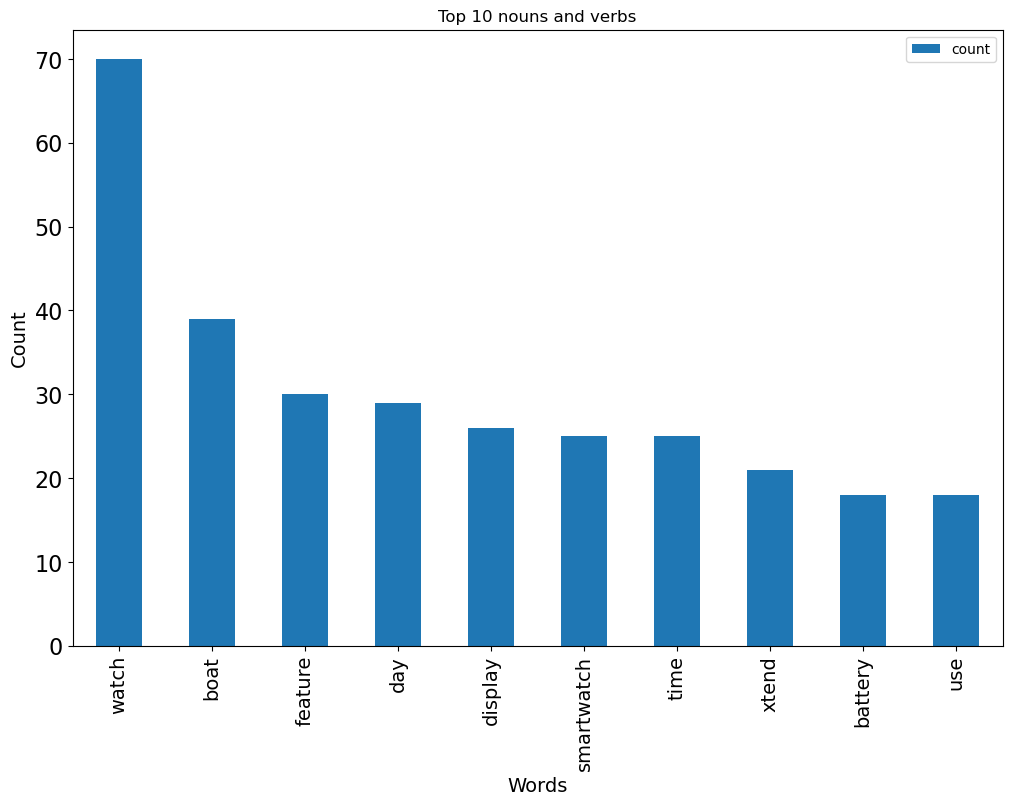

In [72]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs', fontsize=16)
plt.xticks(rotation=90,fontsize=14)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

In [73]:
# Feature Extraction
# BOW Features
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

In [74]:
#TF-IDF Features
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

In [75]:
# Fetch sentiments Using TextBlob
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [76]:
sentiments_using_textblob = dataframe.Clean_Reviews.apply(lambda reviews_text: fetch_sentiment_using_textblob(reviews_text))
pd.DataFrame(sentiments_using_textblob.value_counts())


,Clean_Reviews
pos,9
neg,1


In [77]:
# Let's calculate subjectivity and Polarity
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity
 
# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity
 
dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()


,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews,Subjectivity,Polarity
0,pro look feel feel look premium strap quality ...,"pros:look feel:this feels looks premium, strap...","[pro, look, feel, feel, look, premium, strap, ...",0.620588,0.349020
1,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...,"[smart, model, boat, extend, plus, watch, func...",0.450855,0.320452
2,good quality watch give accurate data exercise...,it good quality watch gives accurate data exer...,"[good, quality, watch, give, accurate, data, e...",0.611111,0.600000
3,watch amazing bought july birthday sold nov go...,the watch amazing. bought july 2022 birthday. ...,"[watch, amazing, bought, july, birthday, sold,...",0.600000,0.766667
4,good bluetooth calling difficult use bluetooth...,1. good bluetooth calling difficult use blueto...,"[good, bluetooth, calling, difficult, use, blu...",0.555556,0.303333


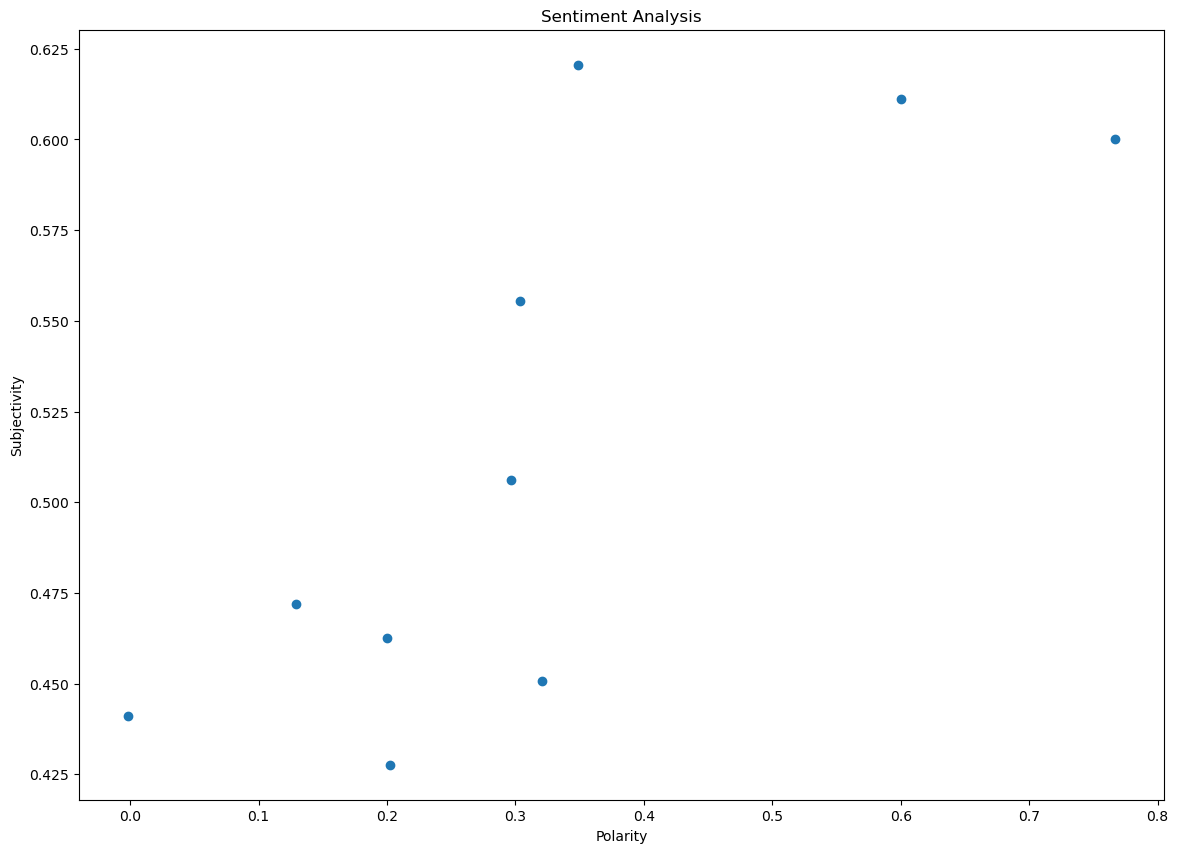

In [78]:
f, axes = plt.subplots(figsize = (14,10))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity');

In [79]:
dataframe['sentiment'] = sentiments_using_textblob
dataframe.to_csv("clean_review.csv",index=False)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews,Subjectivity,Polarity,sentiment
0,pro look feel feel look premium strap quality ...,"pros:look feel:this feels looks premium, strap...","[pro, look, feel, feel, look, premium, strap, ...",0.620588,0.349020,pos
1,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...,"[smart, model, boat, extend, plus, watch, func...",0.450855,0.320452,pos
2,good quality watch give accurate data exercise...,it good quality watch gives accurate data exer...,"[good, quality, watch, give, accurate, data, e...",0.611111,0.600000,pos
3,watch amazing bought july birthday sold nov go...,the watch amazing. bought july 2022 birthday. ...,"[watch, amazing, bought, july, birthday, sold,...",0.600000,0.766667,pos
4,good bluetooth calling difficult use bluetooth...,1. good bluetooth calling difficult use blueto...,"[good, bluetooth, calling, difficult, use, blu...",0.555556,0.303333,pos


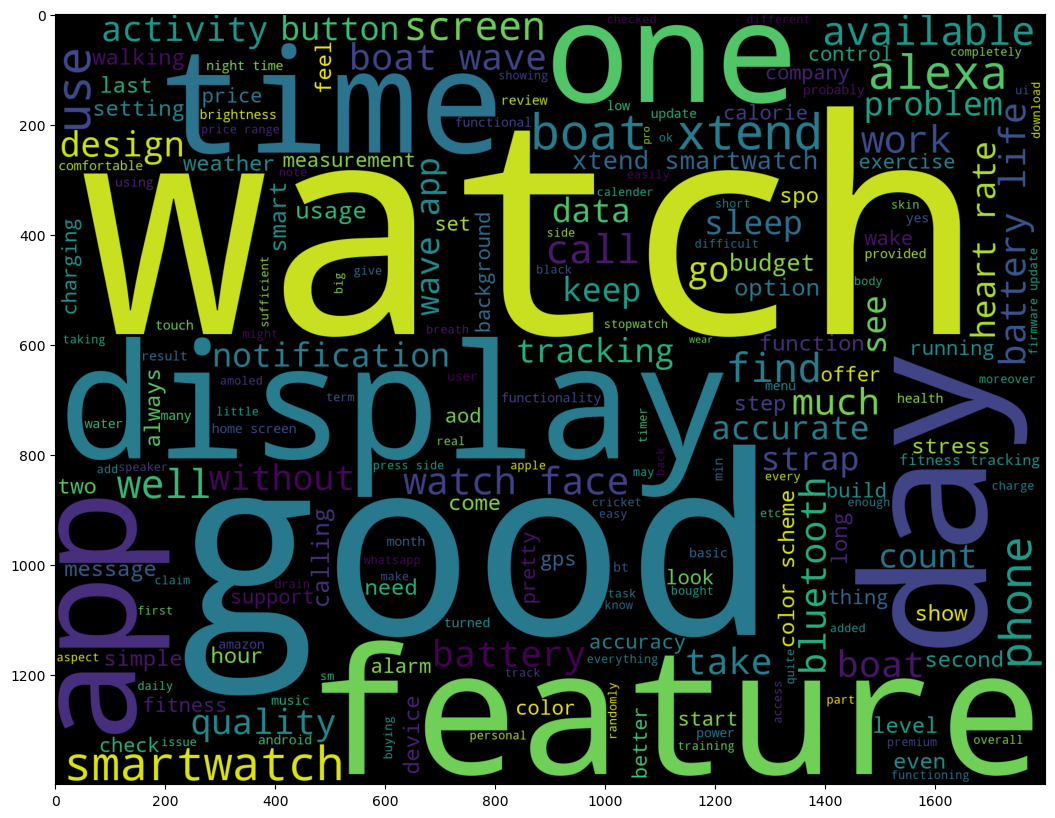

In [80]:
#Story Generation and Visualization
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(14,10))
wordcloud= WordCloud(background_color = 'black', width = 1800, height =1400).generate(allWords_)
plt.imshow(wordcloud);

In [81]:
#Most common words in positive Review
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

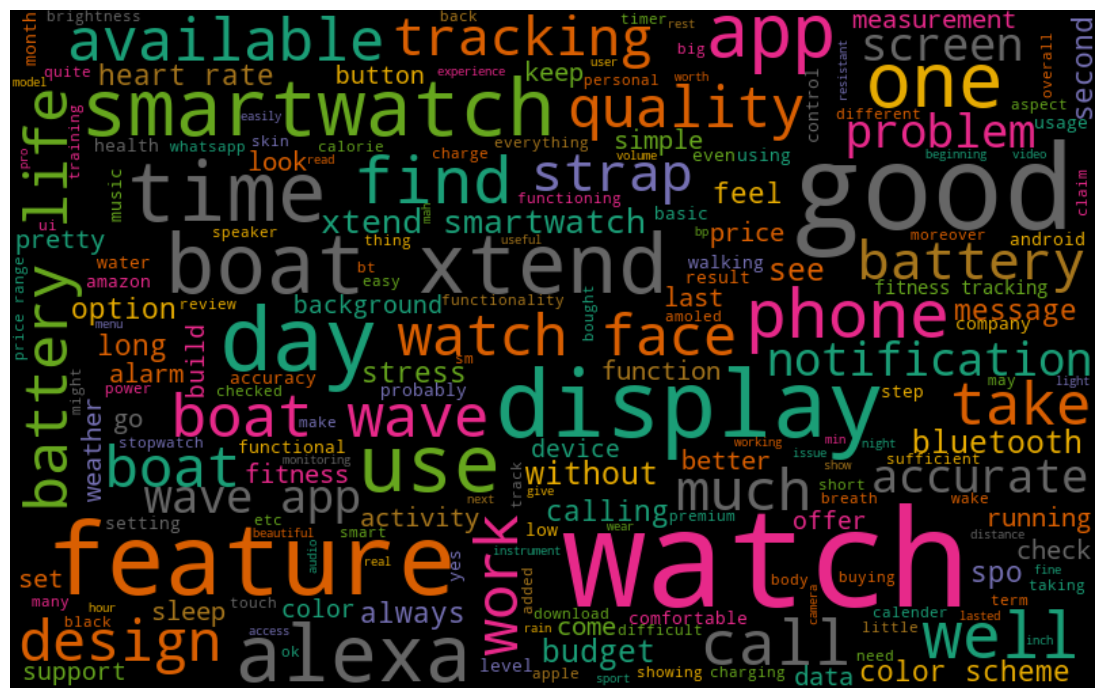

In [82]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'pos']])
generate_wordcloud(all_words)


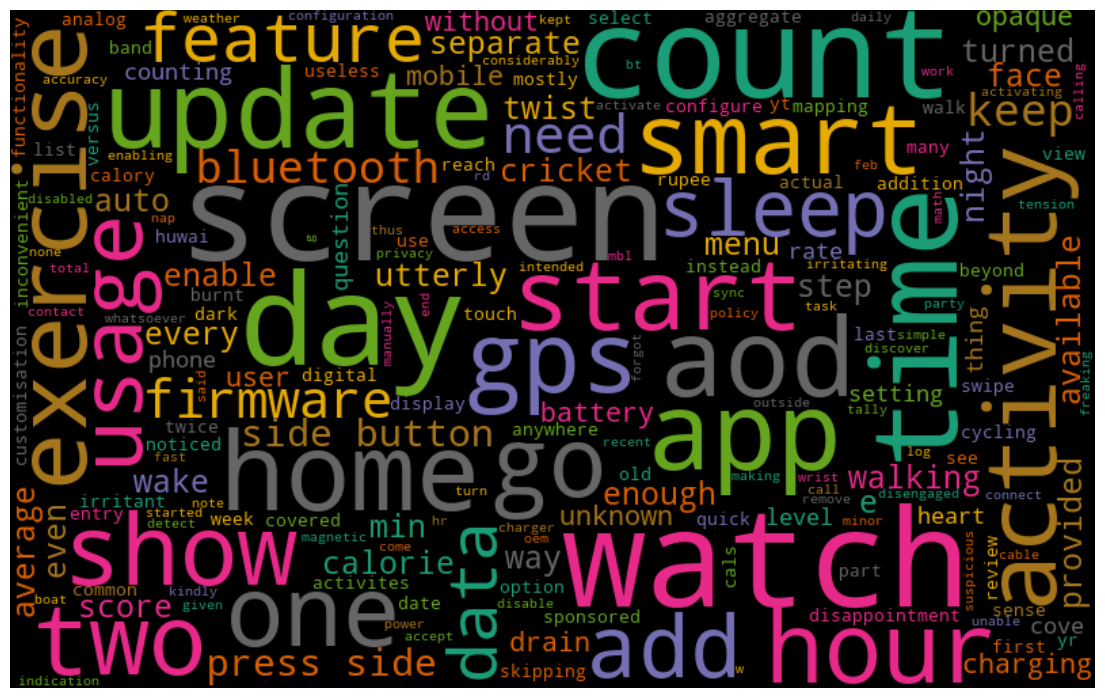

In [83]:
#Most common words in negative Review
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'neg']])
generate_wordcloud(all_words)